In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Charger les fichiers CSV
experiment_results = pd.read_csv("experiment_results.csv")
training_log = pd.read_csv("training_log_2.csv")

# Extraire les données nécessaires
epochs = training_log["iteration"]
train_loss = training_log["loss"]
train_perplexity = training_log["perplexity"]
total_training_tokens = training_log["total_training_tokens"]
param_tokens = training_log["param_tokens"]

# Identifier les moments de scaling (lorsque param_tokens change)
scaling_epochs = epochs[param_tokens.diff().fillna(0) != 0].tolist()
scaling_tokens = [128] + param_tokens[param_tokens.diff().fillna(0) != 0].tolist()

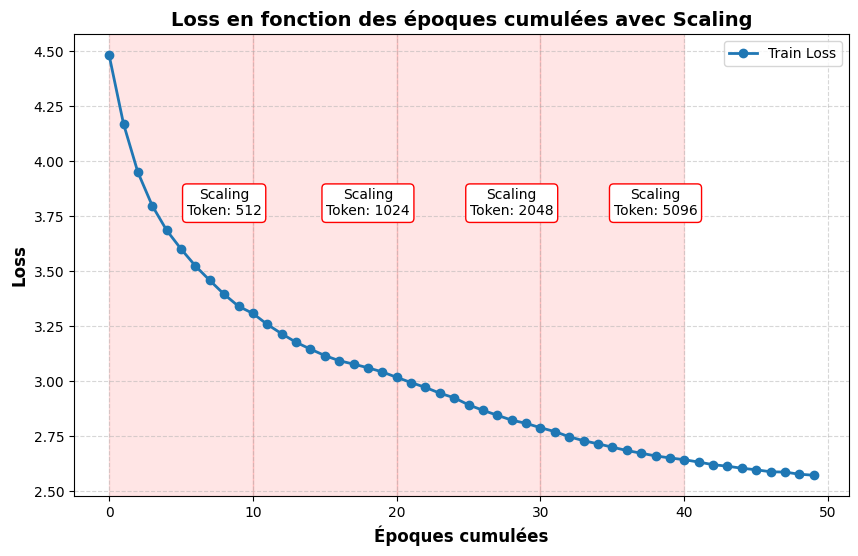

In [12]:
# --- Plot: Loss en fonction des époques cumulées avec Scaling ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Train Loss", marker="o", linestyle="-", linewidth=2)

# Ajouter des zones de scaling avec un fond coloré
for i, epoch in enumerate(scaling_epochs):
    plt.axvspan(epoch - 10, epoch, color="red", alpha=0.1)
    plt.text(epoch - 2, max(train_loss) * 0.85, f"Scaling\nToken: {scaling_tokens[i]}",
             fontsize=10, ha="center", va="center", color="black",
             bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.3"))

plt.xlabel("Époques cumulées", fontsize=12, fontweight="bold")
plt.ylabel("Loss", fontsize=12, fontweight="bold")
plt.title("Loss en fonction des époques cumulées avec Scaling", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



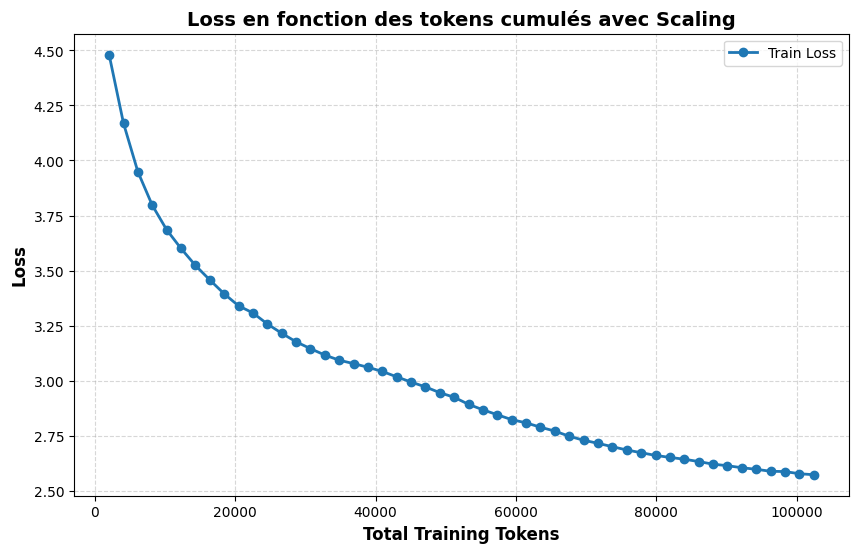

In [33]:
# --- Plot: Loss en fonction du total_training_tokens avec Scaling ---
plt.figure(figsize=(10, 6))
plt.plot(total_training_tokens, train_loss, label="Train Loss", marker="o", linestyle="-", linewidth=2)

# # Ajouter des zones de scaling encore plus à droite
# text_y_pos = max(train_loss)  # Ajuste la hauteur pour qu'elle soit bien visible
# for i, token in enumerate(scaling_tokens):
#     plt.axvspan(token + 10000, token + 15000, color="red", alpha=0.1)  # Encore plus à droite
#     plt.text(token + 13000, max(train_loss) * 0.85, f"Scaling\nToken: {scaling_tokens[i]}",
#              fontsize=10, ha="center", va="center", color="black",
#              bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.3"))  # Texte déplacé aussi

plt.xlabel("Total Training Tokens", fontsize=12, fontweight="bold")
plt.ylabel("Loss", fontsize=12, fontweight="bold")
plt.title("Loss en fonction des tokens cumulés avec Scaling", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

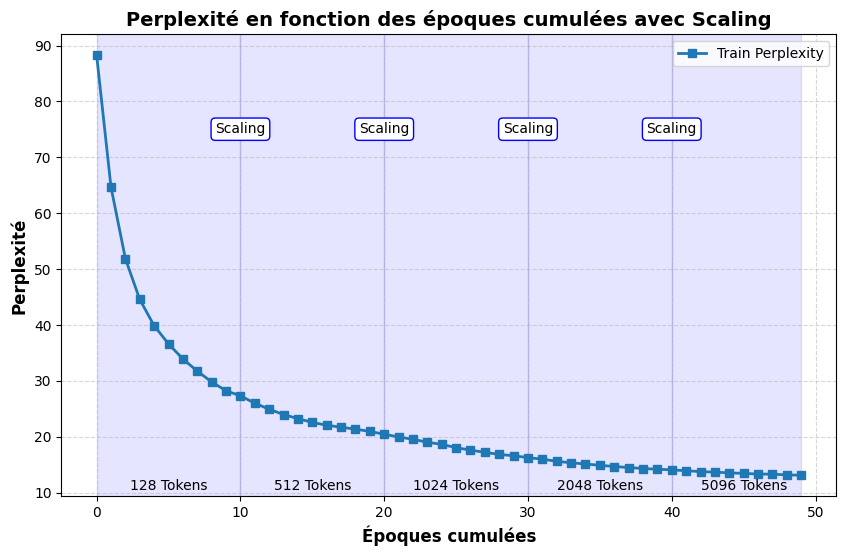

In [79]:
import matplotlib.pyplot as plt

# --- Plot: Perplexité en fonction des époques cumulées avec Scaling ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_perplexity, label="Train Perplexity", marker="s", linestyle="-", linewidth=2)

# Ajouter des zones de scaling avec un fond coloré
for i, epoch in enumerate(scaling_epochs):
    plt.axvspan(epoch - 10, epoch, color="blue", alpha=0.1)
    plt.text(epoch , max(train_perplexity) * 0.85, f"Scaling",
             fontsize=10, ha="center", va="center", color="black",
             bbox=dict(facecolor="white", edgecolor="blue", boxstyle="round,pad=0.3"))

# Ajouter une couleur à la fin (même couleur que les autres)
plt.axvspan(scaling_epochs[-1], max(epochs), color="blue", alpha=0.1)

# Ajouter le nombre de tokens en bas du graphique pour chaque intervalle de 10 époques
token_intervals = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]
tokens_per_interval = [scaling_tokens[0], scaling_tokens[1], scaling_tokens[2], scaling_tokens[3], scaling_tokens[4]]  # Moyenne des tokens par intervalle

for i, (start, end) in enumerate(token_intervals):
    plt.text((start + end) / 2, min(train_perplexity) * 0.95, f"{tokens_per_interval[i]} Tokens",
             fontsize=10, ha="center", va="top", color="black")

# Labels et titre
plt.xlabel("Époques cumulées", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction des époques cumulées avec Scaling", fontsize=14, fontweight="bold")

# Ajout de la légende et du grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Affichage
plt.show()


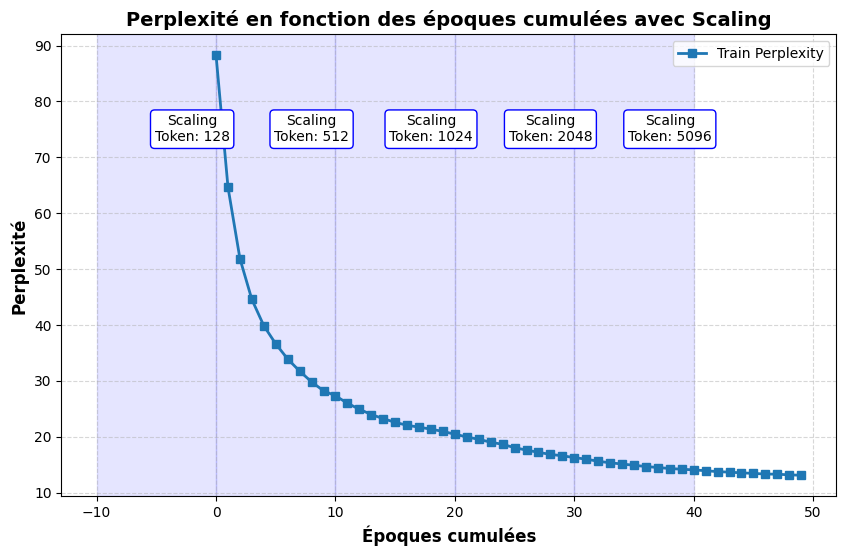

In [57]:
# --- Plot: Perplexité en fonction des époques cumulées avec Scaling ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_perplexity, label="Train Perplexity", marker="s", linestyle="-", linewidth=2)

# Ajouter des zones de scaling avec un fond coloré
for i, epoch in enumerate(scaling_epochs):
    plt.axvspan(epoch - 10, epoch, color="blue", alpha=0.1)
    plt.text(epoch - 2, max(train_perplexity) * 0.85, f"Scaling\nToken: {scaling_tokens[i]}",
             fontsize=10, ha="center", va="center", color="black",
             bbox=dict(facecolor="white", edgecolor="blue", boxstyle="round,pad=0.3"))

plt.xlabel("Époques cumulées", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction des époques cumulées avec Scaling", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()




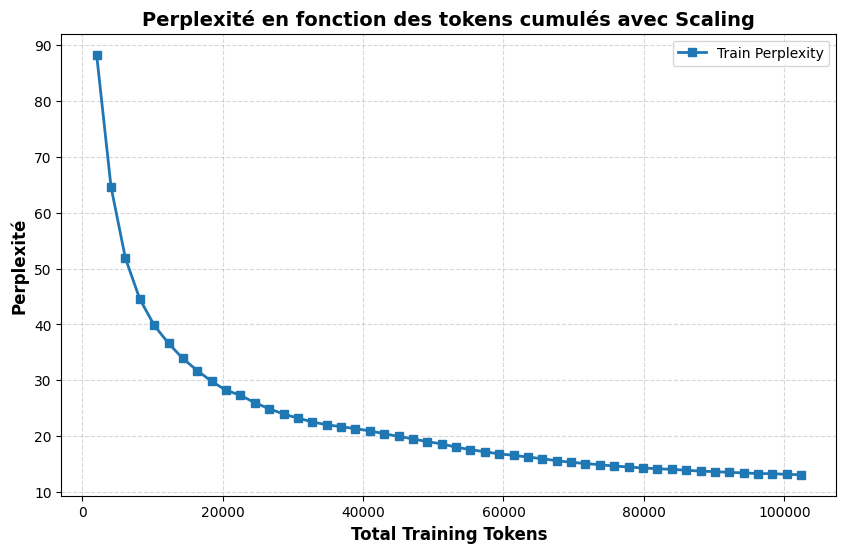

In [80]:
# --- Plot: Perplexité en fonction du total_training_tokens avec Scaling ---
plt.figure(figsize=(10, 6))
plt.plot(total_training_tokens, train_perplexity, label="Train Perplexity", marker="s", linestyle="-", linewidth=2)


plt.xlabel("Total Training Tokens", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction des tokens cumulés avec Scaling", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



Taille de scaling_tokens: 5
Taille attendue: 5
scaling_tokens: [128, 512, 1024, 2048, 5096]


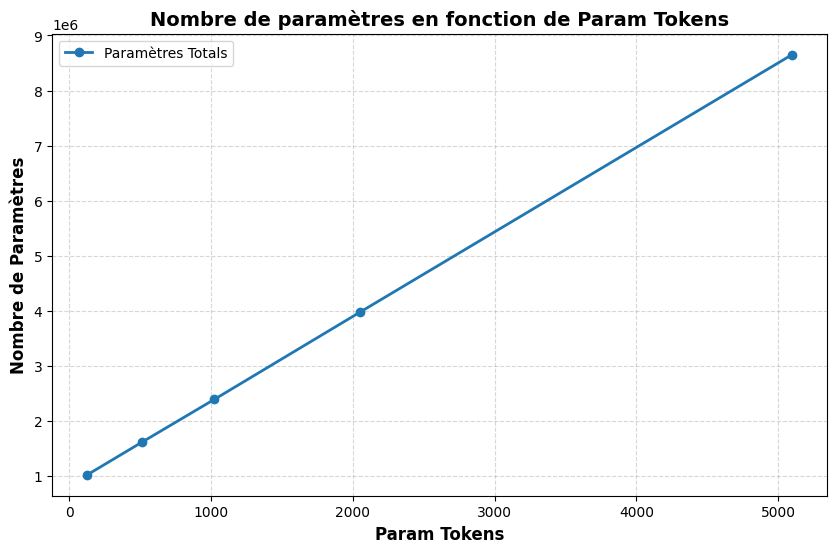

In [39]:
# Liste des paramètres des Tokenformers
tokenformer_params = [1.02e6, 1.61e6, 2.39e6, 3.97e6, 8.65e6]

# Vérifier la taille de scaling_tokens
print(f"Taille de scaling_tokens: {len(scaling_tokens)}")
print(f"Taille attendue: {len(tokenformer_params)}")

# Vérifier les valeurs extraites
print(f"scaling_tokens: {scaling_tokens}")

# S'assurer qu'on prend bien les 5 valeurs correspondantes
if len(scaling_tokens) >= len(tokenformer_params):
    selected_scaling_tokens = scaling_tokens[:len(tokenformer_params)]
else:
    raise ValueError("Le nombre de scaling_tokens est insuffisant pour correspondre aux Tokenformers.")

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(selected_scaling_tokens, tokenformer_params, marker="o", linestyle="-", linewidth=2, label="Paramètres Totals")
plt.xlabel("Param Tokens", fontsize=12, fontweight="bold")
plt.ylabel("Nombre de Paramètres", fontsize=12, fontweight="bold")
plt.title("Nombre de paramètres en fonction de Param Tokens", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Taille de training_times_tokenformers: 5
Taille de scaling_epochs: 5
training_times_tokenformers: [9, 19, 29, 39, 49]
scaling_epochs: [0, 10, 20, 30, 40]
Taille de perplexity_at_scaling: 5


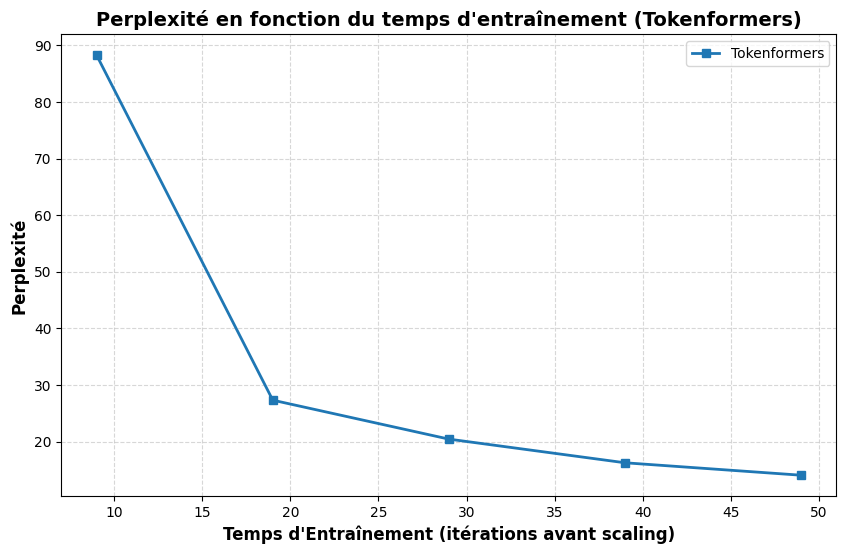

In [49]:
# Extraire les données nécessaires
train_perplexity = training_log["perplexity"]

# Identifier les moments de scaling (lorsque param_tokens change)
scaling_epochs = [0] + training_log[training_log["param_tokens"].diff().fillna(0) != 0]["iteration"].tolist()

# Vérifier la longueur de scaling_epochs et training_times_tokenformers
training_times_tokenformers = training_log.groupby("param_tokens")["iteration"].max().tolist()

print(f"Taille de training_times_tokenformers: {len(training_times_tokenformers)}")
print(f"Taille de scaling_epochs: {len(scaling_epochs)}")

# Vérifier les valeurs extraites
print(f"training_times_tokenformers: {training_times_tokenformers}")
print(f"scaling_epochs: {scaling_epochs}")

# Vérifier que scaling_epochs contient bien 5 valeurs
if len(training_times_tokenformers) != len(scaling_epochs):
    raise ValueError("Le nombre de training_times_tokenformers et scaling_epochs ne correspond pas !")

# Sélectionner les perplexités aux moments de scaling
perplexity_at_scaling = train_perplexity.iloc[scaling_epochs].tolist()

# Vérifier les tailles avant le plot
print(f"Taille de perplexity_at_scaling: {len(perplexity_at_scaling)}")

# Tracer la perplexité en fonction du temps d'entraînement
plt.figure(figsize=(10, 6))
plt.plot(training_times_tokenformers, perplexity_at_scaling, marker="s", linestyle="-", linewidth=2, label="Tokenformers")

plt.xlabel("Temps d'Entraînement (itérations avant scaling)", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction du temps d'entraînement (Tokenformers)", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

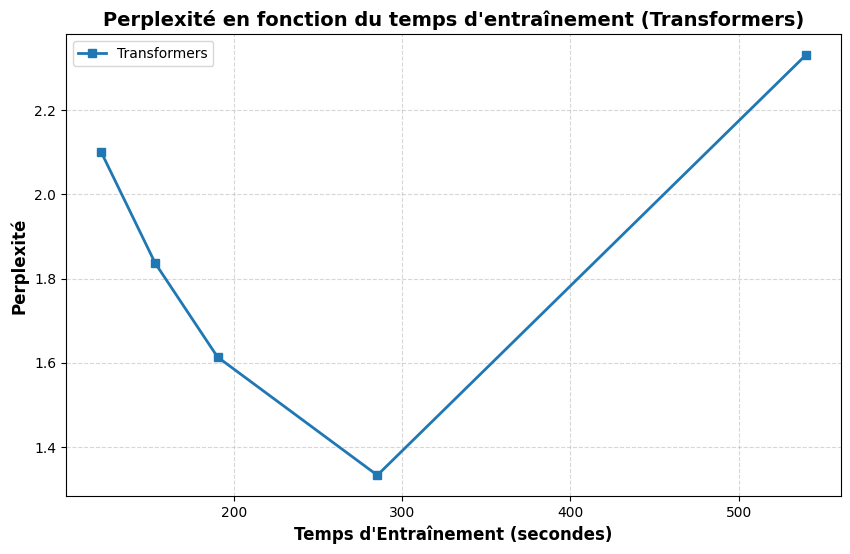

In [10]:
# --- Plot: Perplexité en fonction du temps d'entraînement pour les Transformers ---
training_times_transformers = experiment_results["TrainingTime"]
perplexities_transformers = experiment_results["FinalPerplexity"]

plt.figure(figsize=(10, 6))
plt.plot(training_times_transformers, perplexities_transformers, marker="s", linestyle="-", linewidth=2, label="Transformers")

plt.xlabel("Temps d'Entraînement (secondes)", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction du temps d'entraînement (Transformers)", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Taille de training_times_tokenformers: 5
Taille de scaling_epochs: 5


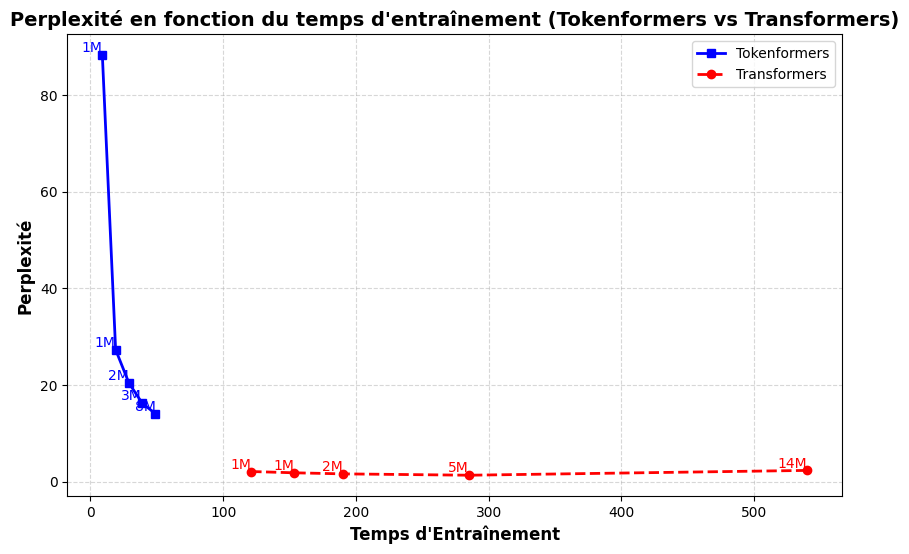

In [53]:
# Vérifier la longueur de scaling_epochs et training_times_tokenformers
training_times_tokenformers = training_log.groupby("param_tokens")["iteration"].max().tolist()

# Liste des paramètres des Tokenformers (à associer aux moments de scaling)
tokenformer_params = [1.02e6, 1.61e6, 2.39e6, 3.97e6, 8.65e6]

# Vérifier les longueurs des listes
print(f"Taille de training_times_tokenformers: {len(training_times_tokenformers)}")
print(f"Taille de scaling_epochs: {len(scaling_epochs)}")

# Vérifier que scaling_epochs contient bien 5 valeurs
if len(training_times_tokenformers) != len(scaling_epochs):
    raise ValueError("Le nombre de training_times_tokenformers et scaling_epochs ne correspond pas !")

# Sélectionner les perplexités aux moments de scaling
perplexity_at_scaling = train_perplexity.iloc[scaling_epochs].tolist()

# Extraire les données des Transformers
training_times_transformers = experiment_results["TrainingTime"]
perplexities_transformers = experiment_results["FinalPerplexity"]
transformer_params = experiment_results["ParameterCount"]

# --- Tracé de la perplexité en fonction du temps d'entraînement pour les Tokenformers et Transformers ---
plt.figure(figsize=(10, 6))

# Courbe des Tokenformers
plt.plot(training_times_tokenformers, perplexity_at_scaling, marker="s", linestyle="-", linewidth=2, label="Tokenformers", color="blue")

# Ajouter les annotations des paramètres pour Tokenformers
for i, txt in enumerate(tokenformer_params):
    plt.text(training_times_tokenformers[i], perplexity_at_scaling[i], f"{int(txt/1e6)}M", 
             fontsize=10, ha="right", va="bottom", color="blue")

# Courbe des Transformers
plt.plot(training_times_transformers, perplexities_transformers, marker="o", linestyle="--", linewidth=2, label="Transformers", color="red")

# Ajouter les annotations des paramètres pour Transformers
for i, txt in enumerate(transformer_params):
    plt.text(training_times_transformers[i], perplexities_transformers[i], f"{int(txt/1e6)}M", 
             fontsize=10, ha="right", va="bottom", color="red")

# Labels et titre
plt.xlabel("Temps d'Entraînement", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction du temps d'entraînement (Tokenformers vs Transformers)", fontsize=14, fontweight="bold")

# Ajout de la légende et du grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Affichage
plt.show()


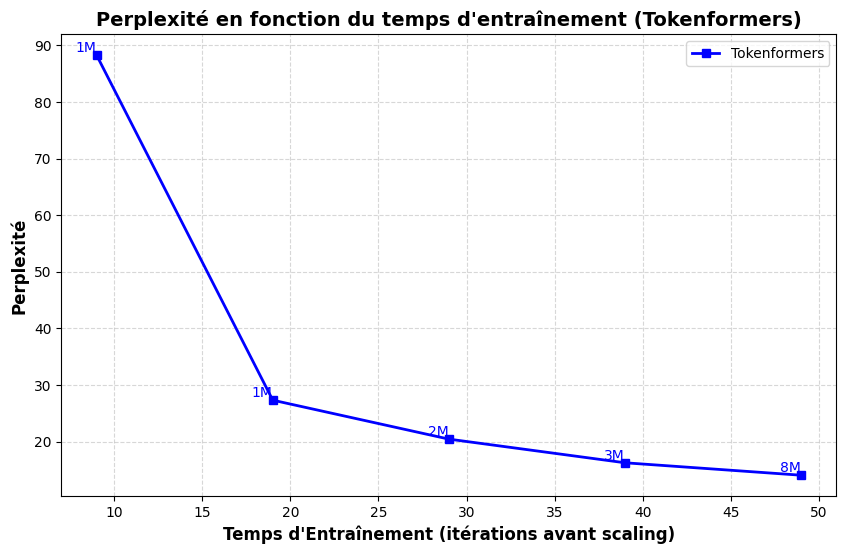

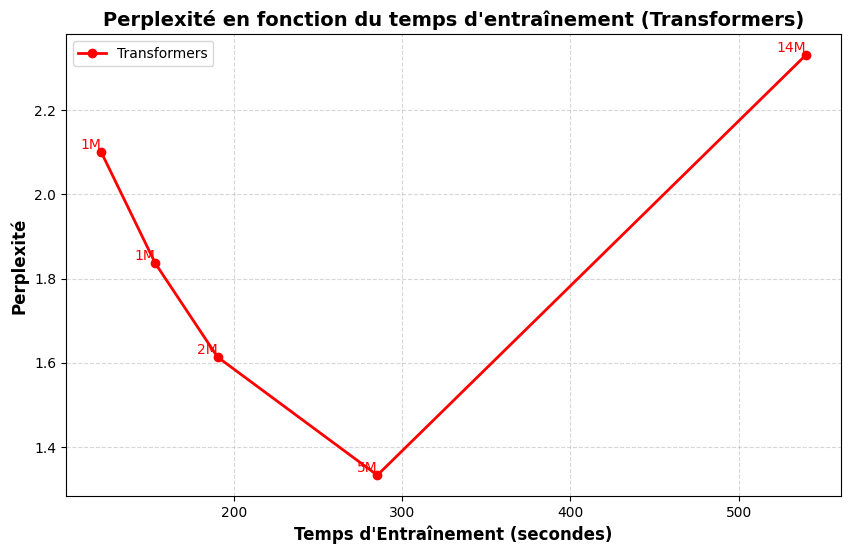

In [55]:
# Sélectionner les perplexités aux moments de scaling
perplexity_at_scaling = train_perplexity.iloc[scaling_epochs].tolist()

# Extraire les données des Transformers
training_times_transformers = experiment_results["TrainingTime"]
perplexities_transformers = experiment_results["FinalPerplexity"]
transformer_params = experiment_results["ParameterCount"]

# --- 📌 Tracé de la perplexité en fonction du temps d'entraînement pour les Tokenformers ---
plt.figure(figsize=(10, 6))
plt.plot(training_times_tokenformers, perplexity_at_scaling, marker="s", linestyle="-", linewidth=2, label="Tokenformers", color="blue")

# Ajouter les annotations des paramètres pour Tokenformers
for i, txt in enumerate(tokenformer_params):
    plt.text(training_times_tokenformers[i], perplexity_at_scaling[i], f"{int(txt/1e6)}M", 
             fontsize=10, ha="right", va="bottom", color="blue")

# Labels et titre
plt.xlabel("Temps d'Entraînement (itérations avant scaling)", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction du temps d'entraînement (Tokenformers)", fontsize=14, fontweight="bold")

# Ajout de la légende et du grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Affichage
plt.show()

# --- 📌 Tracé de la perplexité en fonction du temps d'entraînement pour les Transformers ---
plt.figure(figsize=(10, 6))
plt.plot(training_times_transformers, perplexities_transformers, marker="o", linestyle="-", linewidth=2, label="Transformers", color="red")

# Ajouter les annotations des paramètres pour Transformers
for i, txt in enumerate(transformer_params):
    plt.text(training_times_transformers[i], perplexities_transformers[i], f"{int(txt/1e6)}M", 
             fontsize=10, ha="right", va="bottom", color="red")

# Labels et titre
plt.xlabel("Temps d'Entraînement (secondes)", fontsize=12, fontweight="bold")
plt.ylabel("Perplexité", fontsize=12, fontweight="bold")
plt.title("Perplexité en fonction du temps d'entraînement (Transformers)", fontsize=14, fontweight="bold")

# Ajout de la légende et du grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Affichage
plt.show()
